<a href="https://colab.research.google.com/github/K1TS/Hackathon/blob/master/Classification_Hackathon_1074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Hackathon

For the specifications for today's Hackathon use the slides linked below. Just note a couple things before you start:
* Use your full name and ```_EDSA``` as your Zindi username.
* The dataset for this challenge is very large and will take a long time to process. In order to use your time wisely, only use a small subset of the data to figure out how to solve this challenge, and once you're happy with that, train your model with the entire dataset.
* This Zindi challenge is tough. This will be taken into account when the supervisors mark your work. Do not worry too much about your placement on the leaderboard. In the Regression Hackathon ```laura_the_explorer``` was in first place but is outside the top 100 in this challenge
* To submit your Hackathon to Athena, zip your notebook and your submission csv file, and upload that here. Note that your report card will say you have 100% once you submit your file.
* Please attach the *Honour code* (below) cell to your notebook. 

Further instructions found on these slides: https://docs.google.com/presentation/d/1AbVndI5aOd27Jm0E1qNoYzRtWiZ6-DE3BDE0djGxzIk/edit?usp=sharing

** Good luck! **

## Honour Code
I Trevor Khomotso, Senyane, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## For us to solveThis Problem:
- We first have to import Important Packages 
- Geather data
- Do Explonatary Data Analysi
-Deal with Dta Imbalance

# Importing Important Packages 

In [0]:
# data analysis and data wrangling
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from scipy.stats import norm, skew 

# Importing DataSets

In [0]:
train=pd.read_csv('/content/training.csv')
test=pd.read_csv('/content/test (3).csv')
sample=pd.read_csv('/content/sample_submission (1).csv')
info=pd.read_csv('/content/Xente_Variable_Definitions.csv')

In [0]:
train.head(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0


In [0]:
test.head(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4


## Checking missing values 

In [0]:
print('train',train.isnull().sum().sum())
print('test',test.isnull().sum().sum())


train 0
test 0


There are no missing values  in this case

# Explonatary Data Analysis

In The Explonatary Data Analysis we want to check relationships on different cattegoties to see which features relate with fraud 

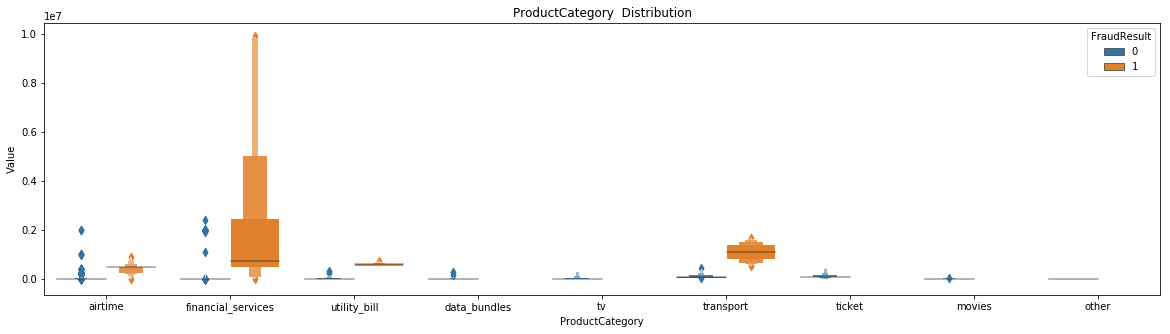

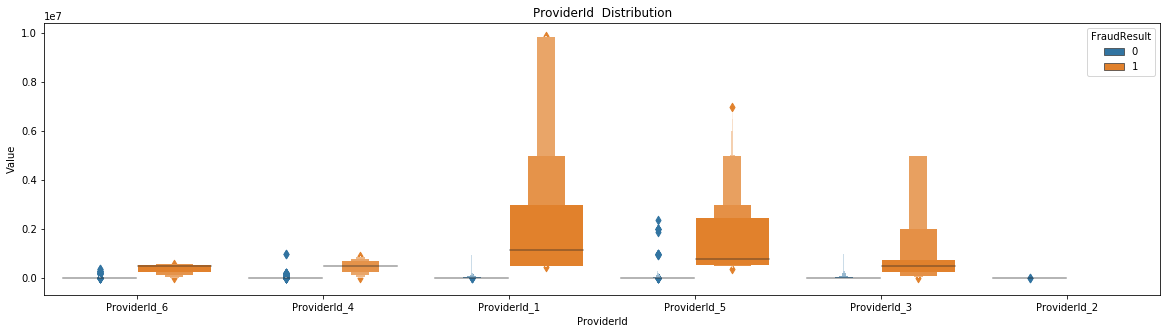

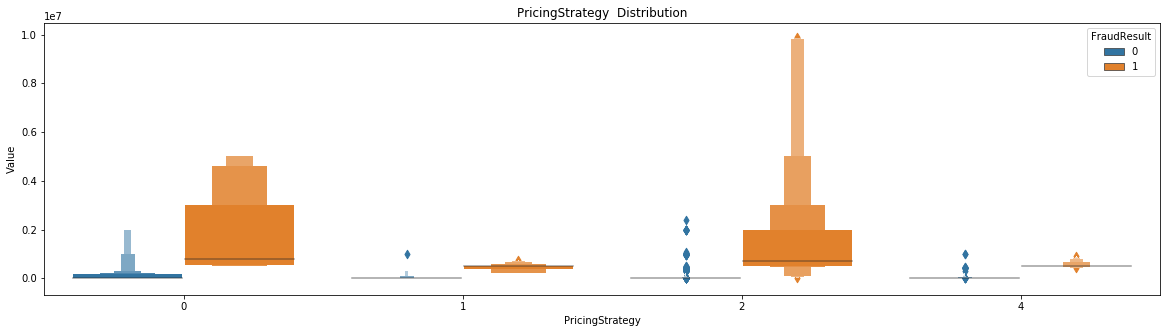

In [0]:
def boxen_plots(df):
  scale=['ProductCategory','ProviderId','PricingStrategy']
  
  for i in scale:
    plt.figure(figsize=(20,5))
    plt.title(i+'  '+'Distribution')
    sns.boxenplot(df[i], train['Value'], hue=train['FraudResult'])
boxen_plots(train)

# Data Balancing

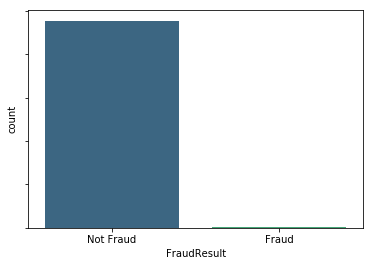

In [0]:
def fig_balance(df):
  fig, ax = plt.subplots()
  f = sns.countplot(df.FraudResult, palette='viridis')
  f.set_xticklabels(['Not Fraud', 'Fraud'])
  f.set_yticklabels([])
fig_balance(train)  


There is a lot of Embalance in our Data

## Resampling Techniques


Oversampling - Oversampling can be defined as adding more copies of the minority class

In [0]:
# Separate input features and target
y,X= train.FraudResult,train.drop('FraudResult', axis=1)

#  testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
not_fraud = train[train.FraudResult==0]
fraud = train[train.FraudResult==1]

# upsample minority
fraud_upsampled = resample(fraud,
                         replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.FraudResult.value_counts()


1    95469
0    95469
Name: FraudResult, dtype: int64

[]

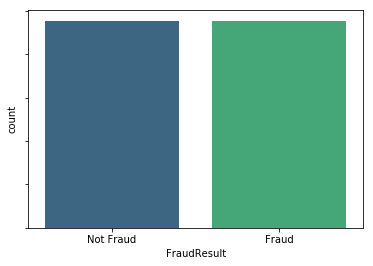

In [0]:
upsampledfig, ax = plt.subplots()
f = sns.countplot(upsampled.FraudResult, palette='viridis')
f.set_xticklabels(['Not Fraud', 'Fraud'])
f.set_yticklabels([])

In [0]:
combine = pd.concat([upsampled,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
# Our Data Set Is Now Balanced

combine=combine.drop(['CurrencyCode','CountryCode','TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','TransactionStartTime'],axis=1)

Our Data is now balanced let us try some Feature Engineering

# Data Processing For Model Fitting

In [0]:
data=pd.get_dummies(combine)
X_train=data.iloc[:len(upsampled),:].drop('FraudResult',axis=1)
y_train=data.iloc[:len(upsampled),:][['FraudResult']]
X_test=data.iloc[len(upsampled):,:].drop('FraudResult',axis=1)

Now  we are going to train our data and predict using different methods

In [0]:
## Logistic Regression

In [0]:

logreg = LogisticRegression(C=100,max_iter=100,intercept_scaling=100,solver='liblinear')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


98.3

## We now Try Our Model Without Upsumpling and Down Sumpling

In [0]:
combine = pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
combine=combine.drop(['CurrencyCode','CountryCode','TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','TransactionStartTime','Amount'],axis=1)

In [0]:
data=pd.get_dummies(combine)
X_train=data.iloc[:len(train),:].drop('FraudResult',axis=1)
y_train=data.iloc[:len(train),:][['FraudResult']]
X_test=data.iloc[len(train):,:].drop('FraudResult',axis=1)

##  Logistic Regression

In [0]:

logreg = LogisticRegression(C=100,max_iter=100,intercept_scaling=100,solver='liblinear')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99.83

Our Model works better without data resampling

##  Support Vector Mechine

In [0]:
# Support Vector Machines

svc = SVC(C=100000,degree=45,shrinking=False,probability=True,tol=0.2)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99.97

### Sumbitting the csv file

In [0]:
sample['FraudResult']=xgb
sample.to_csv('first_pred11.csv',index=False)